In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

# Métricas de Regressão

Usualmente, a pontuação $R^2$ é suficiente.
<ul>
<li> Ela computa o quão bem instâncias futuras serão preditas.
<li> A melhor pontuação possível é igual a 1.0 .
<li> Pontuação com predição constante é igual a 0.0 .
<li> Há casos (geralmente em problemas não lineares) em que R<sup>2</sup> é negativo.
</ul>

Métricas alternativas:
<ul>
<li> <code> mean_absolute error</code> (Diferença absoluta entre os valores reais e preditos).
<li> <code> mean_square_error</code>  (Diferença quadratica entre os valores reais e preditos).
<li> <code> media_absolute_error</code>  (Robusto a <em>outliers</em>).
</ul>

In [3]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Modelo Linear, coeficientes:  [-698.80206267]
Erro quadrático médio (Modelo Fictício): 4965.13
Erro quadrático médio (Modelo Linear): 4646.74
Pontuação R^2 (Modelo Fictício): -0.000
Pontuação R^2 (Modelo Linear): 0.064


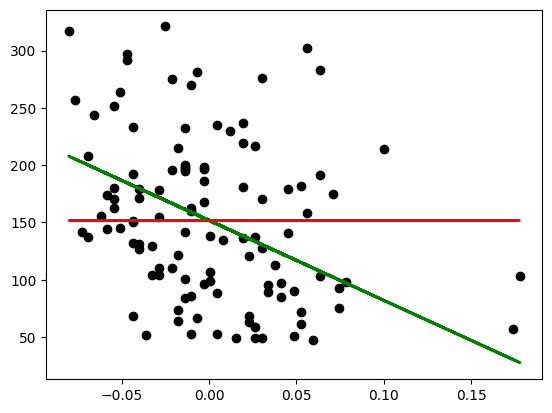

In [7]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg_dm_mean = DummyRegressor(strategy='mean').fit(X_train, y_train)

y_predict = lin_reg.predict(X_test)
y_predict_dm_mean = lin_reg_dm_mean.predict(X_test)

print('Modelo Linear, coeficientes: ', lin_reg.coef_)

print(f'Erro quadrático médio (Modelo Fictício): {mean_squared_error(y_test, y_predict_dm_mean):.2f}')
print(f'Erro quadrático médio (Modelo Linear): {mean_squared_error(y_test, y_predict):.2f}')

print(f'Pontuação R^2 (Modelo Fictício): {r2_score(y_test, y_predict_dm_mean):.3f}')
print(f'Pontuação R^2 (Modelo Linear): {r2_score(y_test, y_predict):.3f}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dm_mean, color='red', linestyle='dashed', linewidth=2, label='dummy')
plt.show()